In [1]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as stat

import matplotlib.pyplot as plt



In [2]:
soft_drink = pd.read_excel("data/soft_drink.xlsx",
                          header=None,
                          names=["y","x1","x2"])
soft_drink.head()

,y,x1,x2
0,16.68,7,560
1,11.50,3,220
2,12.03,3,340
3,14.88,4,80
4,13.75,6,150


# Method of scaling residual

In [68]:
X_soft_drink = soft_drink[["x1","x2"]]
X_soft_drink.head()

,x1,x2
0,7,560
1,3,220
2,3,340
3,4,80
4,6,150


In [70]:
np.ones_like(X_soft_drink.x1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [97]:
X_soft_drink.head()

,intercpt,x1,x2
0,1,7,560
1,1,3,220
2,1,3,340
3,1,4,80
4,1,6,150


<AxesSubplot:xlabel='x1', ylabel='x2'>

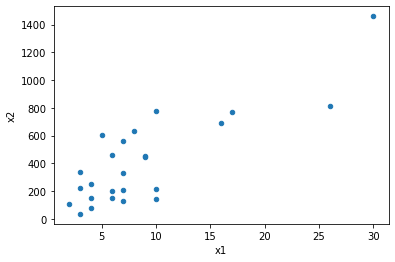

In [21]:
X_soft_drink.plot("x1","x2",kind="scatter")

In [5]:
Y_soft_drink = soft_drink["y"]
Y_soft_drink.head()

0    16.68
1    11.50
2    12.03
3    14.88
4    13.75
Name: y, dtype: float64

In [74]:
lr_soft_drink = sm.OLS(Y_soft_drink,X_soft_drink).fit()

In [75]:
scaled_residual = pd.DataFrame(lr_soft_drink.resid,
                              columns=["residual"])
scaled_residual.head()

,residual
0,-5.028084
1,1.146385
2,-0.049794
3,4.924354
4,-0.444398


## Hat Matrix 

$$H = X(X^\intercal X)^{-1} X^\intercal$$

1. This matrix one of the important matrix in the Linear regression.
2. the diagonal of this matirx $h_{ii}$ tell the distance of point $x_i$ in the euclidean space from the centeriod.
3. this matrix help to detect the extrapolation while predicting using the model.


**Step to find the extrapolation:**
1.  Find the $h_{max}$ from the diagonal element of hat matrix
2.  Find the $h_{00}$ for the the given point say $x_0$
$$h_{00} = x_0^\intercal (X^\intercal X)^{-1} x_0$$

3. if the $h_{00} \gt h_{max}$ then the given point is extrapolated

In [102]:
inv_cov_mat_soft_drink = np.linalg.inv(X_soft_drink.T.dot(X_soft_drink))
hat_matrix_soft_drink  = X_soft_drink.dot(inv_cov_mat_soft_drink.dot(X_soft_drink.T))


In [103]:
h_ii = hat_matrix_soft_drink.to_numpy().diagonal()
h_max = h_ii.max()

In [104]:
h_max

0.498292159124427

In [105]:
x_0 

array([[  1],
       [  8],
       [275]])

In [122]:
x_0.squeeze()

array([  1,   8, 275])

In [115]:
h_00 = x_0.T.dot(inv_cov_mat_soft_drink.dot(x_0))
h_00.squeeze()

array(0.05397255)

In [127]:
def find_extrapolation(point,h_max):
    h_00 = point.T.dot(inv_cov_mat_soft_drink.dot(point))
    if(h_00 > h_max):
        print(f"The point {point.squeeze()} is an extrapolation point. \n since h_ 00 = {h_00.squeeze():.3f} > h_max = {h_max:.3f}")
    else:
         print(f"The point {point.squeeze()} is an intrapolation point. \n since h_00 = {h_00.squeeze():.3f} < h_max = {h_max:.3f}")

In [128]:
find_extrapolation(x_0,h_max)

The point [  1   8 275] is an intrapolation point. 
 since h_00 = 0.054 < h_max = 0.498


In [129]:
find_extrapolation(np.array([1,20,250]).reshape((-1,1)),h_max)

The point [  1  20 250] is an extrapolation point. 
 since h_ 00 = 0.589 > h_max = 0.498


In [130]:
find_extrapolation(np.array([1,28,500]).reshape((-1,1)),h_max)

The point [  1  28 500] is an extrapolation point. 
 since h_ 00 = 0.899 > h_max = 0.498


## Standardized Residual 

$$d_i = \frac{e_i}{\sqrt{MS_{res}}}$$


1. The average variance is estimated using the $MS_{res}$
2. Standardized residual have mean zero.
3. Standardized residual has apprx unit variance.

<span class="mark">IF $d_i \gt 3$ indicate the outlier.</span>

In [76]:
scaled_residual["std_residual"] = scaled_residual.residual / np.sqrt(
    lr_soft_drink.mse_resid)

In [77]:
scaled_residual.head()

,residual,std_residual
0,-5.028084,-1.542606
1,1.146385,0.351709
2,-0.049794,-0.015277
3,4.924354,1.510782
4,-0.444398,-0.136341


In [78]:
scaled_residual.std_residual

0    -1.542606
1     0.351709
2    -0.015277
3     1.510782
4    -0.136341
5    -0.088841
6     0.259129
7     0.354844
8     2.276351
9     0.729079
10    0.686458
11   -0.181944
12    0.315084
13    0.327518
14    0.205923
15   -0.203385
16    0.133874
17    1.058030
18    0.550148
19   -1.775738
20   -0.802025
21   -1.131019
22   -1.413593
23   -1.402942
24   -0.065220
Name: std_residual, dtype: float64

In [79]:
scaled_residual.std_residual.mean()

5.312417172831374e-16

In [80]:
scaled_residual.std_residual.std()

0.957427107756338

## Studentized Residual
$$r_i = \frac{e_i}{\sqrt{MS_{res} (1 - h_{ii})}}$$

In [133]:
inv_cov_mat_soft_drink = np.linalg.inv(X_soft_drink.T.dot(X_soft_drink))
hat_matrix_soft_drink  = X_soft_drink.dot(inv_cov_mat_soft_drink.dot(X_soft_drink.T))


In [135]:
h_ii = hat_matrix_soft_drink.to_numpy().diagonal()
h_ii.shape

(25,)

In [138]:
scaled_residual["student_residual"] = scaled_residual["residual"]/np.sqrt(lr_soft_drink.mse_resid * (1 - h_ii))

In [146]:
X_soft_drink[abs(scaled_residual["student_residual"]) > 3]

,intercpt,x1,x2
8,1,30,1460


<AxesSubplot:xlabel='x1', ylabel='x2'>

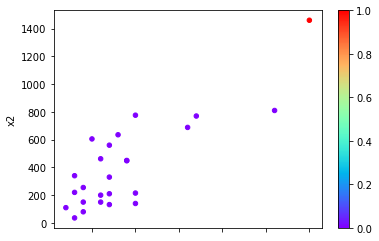

In [153]:
X_soft_drink.plot("x1","x2",
                 kind="scatter",
                 c = abs(scaled_residual["student_residual"]) > 3,
                 cmap ="rainbow")


In [154]:
lr_soft_drink.outlier_test()

,student_resid,unadj_p,bonf(p)
0,-1.695629,0.104733,1.000000
1,0.357538,0.724258,1.000000
2,-0.015722,0.987605,1.000000
3,1.639165,0.116075,1.000000
4,-0.138565,0.891114,1.000000
5,-0.088737,0.930132,1.000000
6,0.264648,0.793861,1.000000
7,0.359390,0.722892,1.000000
8,4.310780,0.000309,0.007726
9,0.806776,0.428839,1.000000


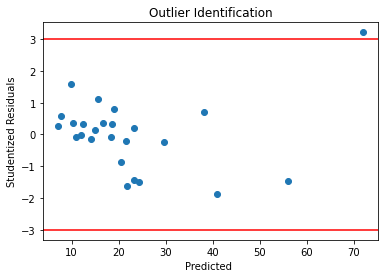

In [158]:
sm_y_hat = lr_soft_drink.predict(X_soft_drink)
plt.axhline(y=-3,color = "red")
plt.axhline(y=3,color = "red")
plt.scatter(x=sm_y_hat,y=scaled_residual["student_residual"])
plt.title('Outlier Identification')
plt.ylabel('Studentized Residuals')
plt.xlabel('Predicted ')
plt.show()

## Press Residual

$$e_{(i)} = \frac{e_i}{1 - h_{ii}}$$


The standandized form of press residual is Studentized residual

In [160]:
scaled_residual["press_residual"] = scaled_residual["residual"]/ ( 1 - h_ii)
scaled_residual["press_residual"]

0     -5.597967
1      1.233603
2     -0.055249
3      5.384013
4     -0.480436
5     -0.302543
6      0.919867
7      1.235327
8     14.788898
9      2.956826
10     2.448378
11    -0.669086
12     1.093872
13     1.158154
14     0.699978
15    -0.794821
16     0.463933
17     3.815946
18     1.984606
19    -6.443140
20    -3.131792
21    -6.059135
22    -4.805858
23    -5.200019
24    -0.227763
Name: press_residual, dtype: float64

## External Studentized residual

Instead of using the $MS_{res}$ use the $S_i^2$

$$S_i^2 = \frac{(n-p)MS_{res} - e_i^2 / (1 - h_{ii})}{n-p-1}$$



$$r_i = \frac{e_i}{\sqrt{S_i^2 (1 - h_{ii})}}$$

In [172]:
numerartor = (lr_soft_drink.df_resid * lr_soft_drink.mse_resid) - ((lr_soft_drink.resid)**2)/ (1 - h_ii)
demo = lr_soft_drink.df_resid -1 

In [173]:
s_i = numerartor/demo

In [174]:
scaled_residual["external_student_residual"] = scaled_residual["residual"]/np.sqrt(s_i * (1 - h_ii))

# Residual Plot 

##  Normal Probability plot

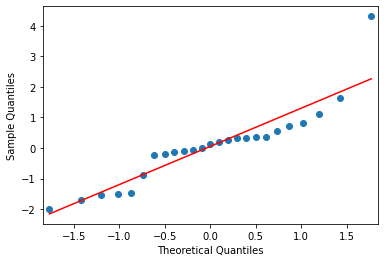

In [184]:
sm.ProbPlot(scaled_residual["external_student_residual"],
         ).qqplot(line="s")
plt.show()

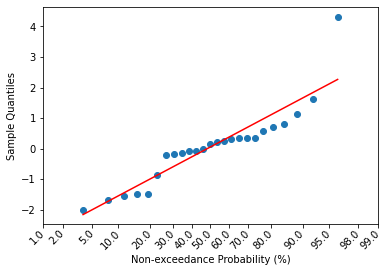

In [185]:
sm.ProbPlot(scaled_residual["external_student_residual"],
         ).probplot(line="s")
plt.show()

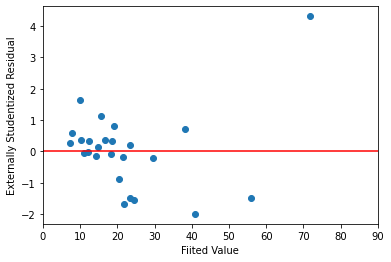

In [190]:
plt.scatter(x = lr_soft_drink.predict(X_soft_drink),
           y =scaled_residual["external_student_residual"])
plt.xticks(np.arange(0,100,10))
plt.xlabel("Fiited Value")
plt.ylabel("Externally Studentized Residual")
plt.axhline(y=0,color ="red")
plt.show()

In [191]:
outlier.ess_press

459.03931470254474